In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sqlalchemy import create_engine

In [63]:
engine = create_engine("postgresql://postgres:@localhost:5432/postgres")
# подключение к базе данных PostgreSQL с помощью SQLAlchemy
df = pd.read_sql("""
SELECT
    country,
    count(*) as cnt
FROM netflix
GROUP BY country
ORDER BY cnt desc
LIMIT 20""", engine)  
df

,country,cnt
0,United States,2818
1,India,972
2,,831
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


In [64]:
df = pd.read_sql("""
SELECT type, COUNT(*)
FROM netflix
GROUP BY type
""", engine) 
# запрос к базе данных PostgreSQL и сохранение результата в DataFrame
df 

,type,count
0,Movie,6131
1,TV Show,2676


<Axes: xlabel='type'>

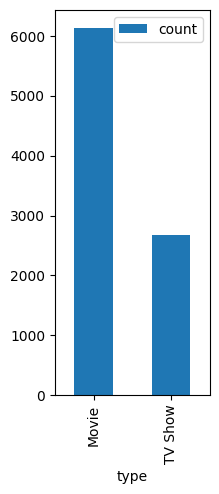

In [65]:
df.plot(kind='bar', x='type', y='count', figsize=(2,5))

In [66]:
df = pd.read_csv(r"C:\Jupyter_notebook\PandasNumPyCourse\data\netflix.csv")
df.head() # первые строки, чтобы увидеть названия колонок и примеры данных
# информация о датафрейме (считал просто csv файл локально)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [67]:
df.describe().round() # основные статистические показатели для числовых колонок

,release_year
count,8807.0
mean,2014.0
std,9.0
min,1925.0
25%,2013.0
50%,2017.0
75%,2019.0
max,2021.0


In [68]:
df.info() # получение статистического резюме по числовым столбцам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [69]:
df['type'].value_counts() # подсчет уникальных значений в столбце 'type'


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [70]:
df['listed_in'].str.split(', ').explode().value_counts().head(20) 


listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: count, dtype: int64

<Axes: xlabel='release_year'>

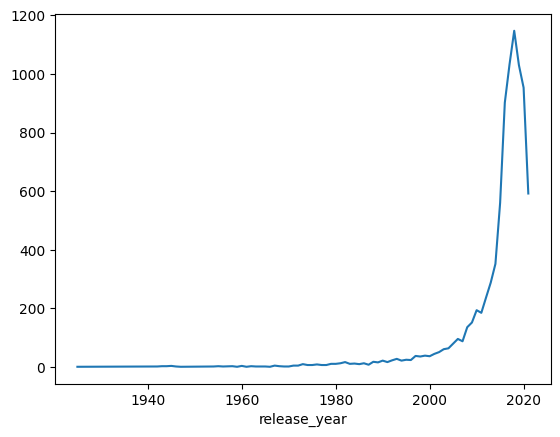

In [71]:
df['release_year'].value_counts().sort_index().plot(kind='line') 
# график количества фильмов и сериалов по годам выпуска 


In [72]:
df['director'].value_counts().head(10) 
# топ 10 режиссеров с наибольшим количеством фильмов и сериалов на Netflix 


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

In [79]:
countries = pd.read_sql("""
SELECT country,
       SUM(CASE WHEN type = 'Movie' THEN 1 ELSE 0 END) AS movies,
       SUM(CASE WHEN type = 'TV Show' THEN 1 ELSE 0 END) AS tv_shows,
       SUM(1) AS total
FROM (
  SELECT trim(c) AS country, type
  FROM netflix n
  CROSS JOIN LATERAL unnest(string_to_array(n.country, ',')) AS c
  WHERE n.country IS NOT NULL AND n.country <> ''
) t
GROUP BY country
ORDER BY total DESC
LIMIT 10""", engine)  
countries # топ 10 стран по количеству фильмов и сериалов на Netflix

,country,movies,tv_shows,total
0,United States,2752,938,3690
1,India,962,84,1046
2,United Kingdom,534,272,806
3,Canada,319,126,445
4,France,303,90,393
5,Japan,119,199,318
6,Spain,171,61,232
7,South Korea,61,170,231
8,Germany,182,44,226
9,Mexico,111,58,169


In [ ]:
countries['share_movies'] = countries['movies'] / countries['total']
countries # добавление нового столбца с долей фильмов от общего количества

,country,movies,tv_shows,total,share_movies
0,United States,2752,938,3690,0.745799
1,India,962,84,1046,0.919694
2,United Kingdom,534,272,806,0.662531
3,Canada,319,126,445,0.716854
4,France,303,90,393,0.770992
5,Japan,119,199,318,0.374214
6,Spain,171,61,232,0.737069
7,South Korea,61,170,231,0.264069
8,Germany,182,44,226,0.805310
9,Mexico,111,58,169,0.656805


,country,movies,tv_shows,total,share_movies
0,United States,2752,938,3690,0.745799
1,India,962,84,1046,0.919694
2,United Kingdom,534,272,806,0.662531
3,Canada,319,126,445,0.716854
4,France,303,90,393,0.770992
5,Japan,119,199,318,0.374214
6,Spain,171,61,232,0.737069
7,South Korea,61,170,231,0.264069
8,Germany,182,44,226,0.805310
9,Mexico,111,58,169,0.656805


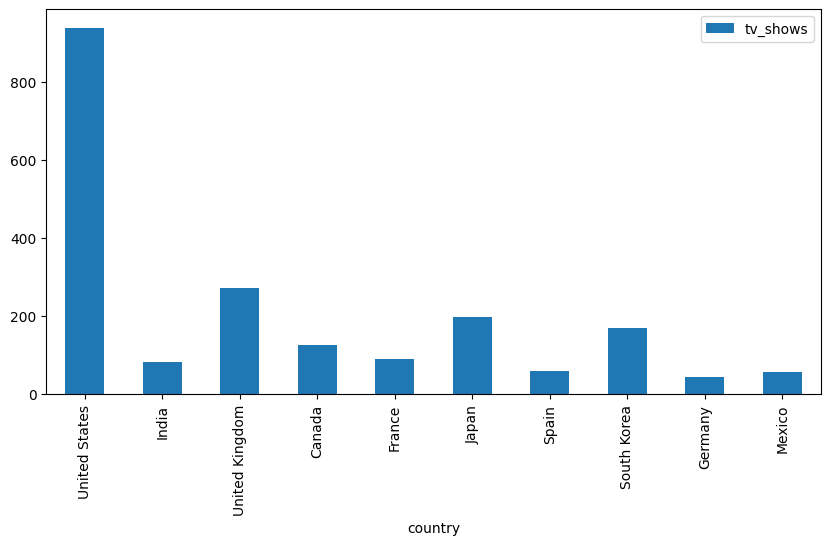

In [78]:
countries.plot(kind='bar', x='country', y='tv_shows', figsize=(10,5))
countries # график количества сериалов по странам